# Jiangpeng Liu
# Will sustainable energy give us a better future
In this project, I will be analyzing whether transitioning to renewable energy sources which decreases CO2 emission positively impacts global human development. The primary goal is to find if there is a positive correlation between the increase of renewable energy and the index that represents human development.

## Collaboration Plan
There is no collaboration plan since it is a solo project

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Dataset
I found the first dataset from [kaggle](https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population). The dataset contains CO2 emission, power generation, types of power sources, and GDP of different Countries. It is a combination of multiple datasets, and the majority of the data is taken from the US Energy Administration. We can use this dataset to answer the question like "Does renewable energy slow down or speed up the growth of GDP?", "Which Country uses the biggest portion of renewable energy", and "Does Countries with higher GDP per capita generate more electricity from clean energy sources?"

### Extraction

In [2]:
energy = pd.read_csv('data/energy.csv')
energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


### Transformation

As we can see There are two index columns: the default index generated by Pandas and the "Unnamed" index from the original dataset, both index do not give us good understandings of the dataset. Instead of using the default index, we can set the combination of Country and year as the new index. The "Unnamed" column contains no useful information, therefore it will be dropped.

In [3]:
# Identify dtypes
energy.dtypes

Unnamed: 0                       int64
Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

In [4]:
energy.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
energy.set_index(['Country', 'Year'], inplace=True)
energy_df = energy.loc['World', :]

In [6]:
All_production = energy_df.loc[energy_df["Energy_type"] == "all_energy_types"][["Energy_production"]]
nuclear_production = energy_df.loc[energy_df["Energy_type"] == "nuclear"][["Energy_production"]]
renewable_production = energy_df.loc[energy_df["Energy_type"] == "renewables_n_other"][["Energy_production"]]
All_production = All_production.rename(columns= {"Energy_production": "All_energy_production"})
nuclear_production = nuclear_production.rename(columns= {"Energy_production": "nuclear_production"})
renewable_production = renewable_production.rename(columns= {"Energy_production": "renewable_production"})

In [7]:
total_df = All_production.merge(nuclear_production, on="Year").merge(renewable_production, on="Year")
total_df["portion"] = (total_df["nuclear_production"] + total_df["renewable_production"]) / total_df["All_energy_production"]

<Axes: title={'center': 'The portion of renewable energy over the years'}, xlabel='Year'>

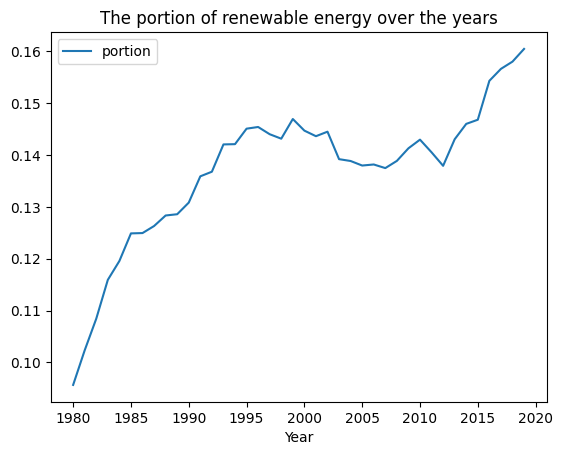

In [13]:
total_df.plot(kind='line', title='The portion of renewable energy over the years', y='portion')